# 머신러닝_회귀분석

In [7]:
import warnings
warnings.filterwarnings(action='ignore')

import os
import random
import tensorflow
import tensorflow as tf

import pandas as pd
import seaborn as sb

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

from tensorflow.keras.models import Sequential  # class
from tensorflow.keras.models import load_model  # model 사용
from tensorflow.keras.layers import Dense       # 전결합
from tensorflow.keras.layers import Dropout     # 특정 node를 사용안함.
from tensorflow.keras.callbacks import EarlyStopping # 학습 자동 중지
from tensorflow.keras import regularizers   # L1, L2 규제 적용
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
 
from sklearn.preprocessing import LabelEncoder  # class가 문자열인경우 변환
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split # 학습셋과 테스트셋을 나눔
from sklearn.model_selection import StratifiedKFold  # K겹 교차 검증
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

import platform 

if (platform.system() == 'Windows'):  # Windows
    rc('font', family=font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name())
    path = '.' # Local
else:    
    plt.rc('font', family='NanumBarunGothic')  # Ubuntu 18.04 기준 한글 처리
    path = '/content/drive/My Drive/ai_202102_ml/rnn/naver_movie' # Colab

plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

# Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령
%matplotlib inline  

In [8]:
X=[i for i in range(6)] #0~5: 공부시간
print(X)

[0, 1, 2, 3, 4, 5]


In [9]:
# y = ax + b, y = 2x + 20, 기울기와 y 절편이 결정된 경우
a = 2  # 임의로 지정
b = 20 # 임의로 지정
Y = [(a * x) + b for x in X]
print(Y) #공부를 전혀 안해도 20점, 5시간을 공부하면 30점 취득 예상

[20, 22, 24, 26, 28, 30]


In [10]:
# a(기울기, y의 변화량/x의 변화량)의 특징 분석
# y = ax + b
X = [i for i in range(6)]  # 0 ~ 5: 공부 시간
print('X:', X)
Y1 = [(5 * x) + 20 for x in X] # f(x) = 5x + 20
Y2 = [(10 * x) + 20 for x in X] # f(x) = 10x + 20
Y3 = [(20 * x) + 20 for x in X] # f(x) = 20x + 20
print('Y1:', Y1) #  0 * 5 + 20 = 20,  1 * 5 + 20 = 25
print('Y2:', Y2) # 0 * 10 + 20 = 20, 1 * 10 + 20 = 30
print('Y3:', Y3) # 0 * 20 + 20 = 20, 1 * 20 + 20 = 40

X: [0, 1, 2, 3, 4, 5]
Y1: [20, 25, 30, 35, 40, 45]
Y2: [20, 30, 40, 50, 60, 70]
Y3: [20, 40, 60, 80, 100, 120]


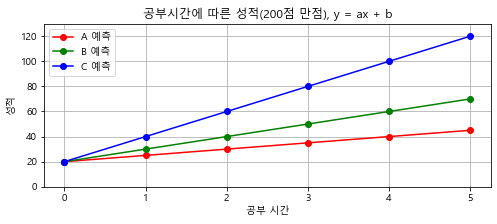

In [11]:
plt.figure(figsize=(8, 3)) # 단위: 인치
# X 공부 시간, Y: 실제 취득 성적
plt.plot(X, Y1, color='red', linestyle='solid', marker='o', label='A 예측')
plt.plot(X, Y2, color='green', linestyle='solid', marker='o', label='B 예측')
plt.plot(X, Y3, color='blue', linestyle='solid', marker='o', label='C 예측')
plt.ylim(0, 130) # y limit: 범위
plt.grid(True) # 격자 출력
plt.title('공부시간에 따른 성적(200점 만점), y = ax + b')
plt.xlabel('공부 시간')
plt.ylabel('성적')
plt.legend()
plt.show()
# a에 어떤수를 지정하는가에 따라 공부시간당 성적이 변경됨.
# b: y 절편, 편향, Bias, 곱하기의 성질상 x가 0이면 무조건 0이되는 문제 해결

In [12]:
# f(x) = ax + b: x -> f(x): 결과, 원인과 결과, 단순 선형회귀, 1차 함수 그래프
y = 2 * 6 + 20
print('6시간 공부한 경우의 예측: ', y, '점')
# 기울기 a와, y 절편 b에 따라 점수 예측 정확도 결정됨.

6시간 공부한 경우의 예측:  32 점


In [13]:
# f(x) = ax + b에서 추론 통계를 이용하여 a, b 산출 가능
# 데이터가 많아지면 a₁, a₂, a₃....복잡해서 산출이 매우 어려움.
# 매출액 = [x₁: 광고 횟수, x₂: 광고 비용, x₃: 방송사]
# 성적 = [x₁: 자율학습 시간, x₂: 보충 수업, x₃: 시험 응시 횟수]
# f(x) = a₁x₁ + a₂x₂+ a₃x₃+ b

# 머신러닝(인공지능)이 하는 역할은
# 최소 오차를 발생시키는 기울기 a와, y 절편 b를 찾는 역활을 함.
# 하지만 현실데이터의 특성상 오차는 존재 할 수 밖에 없음.